# Q1 Plot daily sales for all 50 weeks. 

In [ ]:
# read all CSV files in a folder in Pandas

# inspiration from: https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/

In [5]:
# when all of the CSV files have the same number of columns 

In [53]:
import pandas as pd 
import glob 
import os 

In [54]:
path = 'Desktop/datasets'
csv_files = glob.glob(path + '/*.csv')

In [55]:
df_list = (pd.read_csv(file) for file in csv_files)

In [56]:
big_df = pd.concat(df_list, ignore_index = True)

In [38]:
big_df

,sale_time,purchaser_gender
0,2013-01-07 02:14:07,female
1,2013-01-07 02:57:53,male
2,2013-01-07 02:59:49,female
3,2013-01-07 03:02:53,male
4,2013-01-07 03:27:36,female
...,...,...
204324,2013-08-18 23:05:04,male
204325,2013-08-18 23:07:48,female
204326,2013-08-18 23:10:08,male
204327,2013-08-18 23:25:14,female


In [39]:
# for a few files 
# df = pd.concat(map(pd.read_csv, ['d1.csv','d2.csv','d3.csv']))

# convert sale_time to datetime 

In [40]:
big_df.dtypes # check the column type

sale_time           object
purchaser_gender    object
dtype: object

In [57]:
sale_day = pd.to_datetime(big_df['sale_time'])

In [58]:
sale_day

0        2013-01-07 02:14:07
1        2013-01-07 02:57:53
2        2013-01-07 02:59:49
3        2013-01-07 03:02:53
4        2013-01-07 03:27:36
                 ...        
204324   2013-08-18 23:05:04
204325   2013-08-18 23:07:48
204326   2013-08-18 23:10:08
204327   2013-08-18 23:25:14
204328   2013-08-18 23:30:16
Name: sale_time, Length: 204329, dtype: datetime64[ns]

In [59]:
date = sale_day.dt.floor('d')

# Series.dt.floor() function to floor the datetime date of the given series subject to a specifified freqeuncy 

In [60]:
date

0        2013-01-07
1        2013-01-07
2        2013-01-07
3        2013-01-07
4        2013-01-07
            ...    
204324   2013-08-18
204325   2013-08-18
204326   2013-08-18
204327   2013-08-18
204328   2013-08-18
Name: sale_time, Length: 204329, dtype: datetime64[ns]

In [74]:
daily_sales_df = big_df.groupby(date).size().to_frame('sales_amount')

In [76]:
daily_sales_df

,sales_amount
sale_time,
2012-10-01,514
2012-10-02,482
2012-10-03,499
2012-10-04,546
2012-10-05,476
...,...
2013-09-11,719
2013-09-12,735
2013-09-13,743


# visualization

In [78]:
import matplotlib.pyplot as plt 

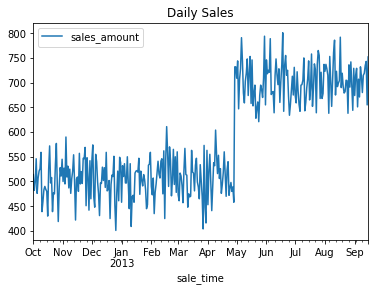

In [85]:
daily_sales_df.plot(title='Daily Sales')
plt.show()

# Q2 It looks like there has been a sudden change in daily sales. What date did it occur?

In [86]:
# compare the sales amount for that date and 1 day before --> see the difference --> the most drastic change indicates sudden change 

In [93]:
daily_sales_df['sales_last_time'] = daily_sales_df['sales_amount'].shift(+1) #similar to lag in SQL

In [95]:
daily_sales_df['difference']= daily_sales_df['sales_amount'] - daily_sales_df['sales_last_time']

In [96]:
daily_sales_df

,sales_amount,sales_last_time,difference
sale_time,,,
2012-10-01,514,NaN,NaN
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0
...,...,...,...
2013-09-11,719,715.0,4.0
2013-09-12,735,719.0,16.0
2013-09-13,743,735.0,8.0


In [100]:
m = daily_sales_df.sort_values(by='difference', key=abs, ascending=False) # find the max difference 

In [101]:
m

,sales_amount,sales_last_time,difference
sale_time,,,
2013-04-29,732,458.0,274.0
2013-03-28,573,404.0,169.0
2013-06-19,642,801.0,-159.0
2013-03-31,563,416.0,147.0
2013-05-31,655,794.0,-139.0
...,...,...,...
2013-03-10,513,514.0,-1.0
2013-03-14,470,469.0,1.0
2013-01-06,497,497.0,0.0


In [110]:
m.nlargest(n=1,columns='difference')

,sales_amount,sales_last_time,difference
sale_time,,,
2013-04-29,732,458.0,274.0


# Q3. Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?

In [ ]:
# scipy.stats include a function to do a t-test and obtain a p value 

In [111]:
from scipy import stats

In [113]:
# first to drop na for the testing 
daily_sales_df.dropna(inplace=True)

In [115]:
# compare most dramatic change sale amount to all the sales_amount collumn
stats.ttest_1samp(daily_sales_df['sales_amount'], 732)

Ttest_1sampResult(statistic=-26.273266340051002, pvalue=1.3019593251472396e-84)

In [ ]:
# pvalue=1.3019593251472396e-84 < 0.05 --> statisitcally significant 

# Q4 Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

In [116]:
daily_sales_df.head()

,sales_amount,sales_last_time,difference
sale_time,,,
2012-10-02,482,514.0,-32.0
2012-10-03,499,482.0,17.0
2012-10-04,546,499.0,47.0
2012-10-05,476,546.0,-70.0
2012-10-06,507,476.0,31.0


In [117]:
big_df.head()

,sale_time,purchaser_gender
0,2013-01-07 02:14:07,female
1,2013-01-07 02:57:53,male
2,2013-01-07 02:59:49,female
3,2013-01-07 03:02:53,male
4,2013-01-07 03:27:36,female


In [119]:
gender_sales_df = big_df.groupby([date, 'purchaser_gender'])

In [137]:
gender = gender_sales_df.size().to_frame('sales_amount_by_gender').reset_index()

In [138]:
gender

,sale_time,purchaser_gender,sales_amount_by_gender
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386
...,...,...,...
695,2013-09-13,male,537
696,2013-09-14,female,193
697,2013-09-14,male,462
698,2013-09-15,female,230


In [136]:
total = m.reset_index()
total

,sale_time,sales_amount,sales_last_time,difference
0,2013-04-29,732,458.0,274.0
1,2013-03-28,573,404.0,169.0
2,2013-06-19,642,801.0,-159.0
3,2013-03-31,563,416.0,147.0
4,2013-05-31,655,794.0,-139.0
...,...,...,...,...
345,2013-03-10,513,514.0,-1.0
346,2013-03-14,470,469.0,1.0
347,2013-01-06,497,497.0,0.0
348,2013-04-30,732,732.0,0.0


In [145]:
n = gender.merge(total, on='sale_time')[['sale_time','purchaser_gender','sales_amount','sales_amount_by_gender']]

In [146]:
n['proportion']=round(n['sales_amount_by_gender']/n['sales_amount'],2)
n

,sale_time,purchaser_gender,sales_amount,sales_amount_by_gender,proportion
0,2012-10-01,female,514,413,0.80
1,2012-10-01,male,514,101,0.20
2,2012-10-02,female,482,379,0.79
3,2012-10-02,male,482,103,0.21
4,2012-10-03,female,499,386,0.77
...,...,...,...,...,...
695,2013-09-13,male,743,537,0.72
696,2013-09-14,female,655,193,0.29
697,2013-09-14,male,655,462,0.71
698,2013-09-15,female,752,230,0.31


In [ ]:
## calculate the proportion difference for each date across gender 
## plot the proportion difference by date 

In [ ]:
## --> for each date, make two columns for female and male 

In [147]:
gender.head()

,sale_time,purchaser_gender,sales_amount_by_gender
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386


# Create new data frame

In [152]:
new_df = pd.DataFrame(gender['sale_time'].unique(),columns=['sale_time'])

In [153]:
new_df # create a new dataframe from gender table 

,sale_time
0,2012-10-01
1,2012-10-02
2,2012-10-03
3,2012-10-04
4,2012-10-05
...,...
345,2013-09-11
346,2013-09-12
347,2013-09-13
348,2013-09-14


In [159]:
## add new columns to this table 
## each column is a series
## pd.Series --> add new columns
new_df['female_sales_amount'] = pd.Series(gender[gender['purchaser_gender']=='female']['sales_amount_by_gender']).reset_index(drop=True)
new_df['male_sales_amount'] = pd.Series(gender[gender['purchaser_gender']=='male']['sales_amount_by_gender']).reset_index(drop=True)
## attention!! we need to reset_index to match the date with female records (even index on the original table)

In [160]:
new_df

,sale_time,female_sales_amount,male_sales_amount
0,2012-10-01,413,101
1,2012-10-02,379,103
2,2012-10-03,386,113
3,2012-10-04,432,114
4,2012-10-05,368,108
...,...,...,...
345,2013-09-11,224,495
346,2013-09-12,225,510
347,2013-09-13,206,537
348,2013-09-14,193,462


In [161]:
## caculate the porportion 
new_df['gender_ratio'] = new_df['male_sales_amount']/new_df['female_sales_amount']

In [162]:
new_df

,sale_time,female_sales_amount,male_sales_amount,gender_ratio
0,2012-10-01,413,101,0.244552
1,2012-10-02,379,103,0.271768
2,2012-10-03,386,113,0.292746
3,2012-10-04,432,114,0.263889
4,2012-10-05,368,108,0.293478
...,...,...,...,...
345,2013-09-11,224,495,2.209821
346,2013-09-12,225,510,2.266667
347,2013-09-13,206,537,2.606796
348,2013-09-14,193,462,2.393782


# visualization

In [165]:
plot_df=new_df.copy() ## create a copy of table to visualize 

In [167]:
plot_df

,sale_time,female_sales_amount,male_sales_amount,gender_ratio
0,2012-10-01,413,101,0.244552
1,2012-10-02,379,103,0.271768
2,2012-10-03,386,113,0.292746
3,2012-10-04,432,114,0.263889
4,2012-10-05,368,108,0.293478
...,...,...,...,...
345,2013-09-11,224,495,2.209821
346,2013-09-12,225,510,2.266667
347,2013-09-13,206,537,2.606796
348,2013-09-14,193,462,2.393782


In [187]:
plot_df['total_sales_amount'] = plot_df['female_sales_amount'] + plot_df['male_sales_amount']
plot_df

,sale_time,female_sales_amount,male_sales_amount,gender_ratio,total_sales_amount
0,2012-10-01,413,101,0.244552,514
1,2012-10-02,379,103,0.271768,482
2,2012-10-03,386,113,0.292746,499
3,2012-10-04,432,114,0.263889,546
4,2012-10-05,368,108,0.293478,476
...,...,...,...,...,...
345,2013-09-11,224,495,2.209821,719
346,2013-09-12,225,510,2.266667,735
347,2013-09-13,206,537,2.606796,743
348,2013-09-14,193,462,2.393782,655


# plot with two different y-axis - method 1

In [169]:
# x-axis: date 
# y1: total sales; y2: gender_ratio --> is there a correlation between these two independent varaibles? 

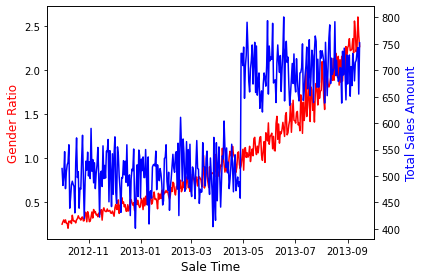

In [191]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

# using the twinx() for creating another
ax2=ax.twinx()

ax.plot(plot_df['sale_time'],plot_df['gender_ratio'], color='red')
ax2.plot(plot_df['sale_time'], plot_df['total_sales_amount'], color='blue')

ax.set_xlabel('Sale Time', fontsize=12)

ax.set_ylabel('Gender Ratio', fontsize=12, color='red')
ax2.set_ylabel('Total Sales Amount', fontsize=12, color='blue')

plt.tight_layout()
plt.show()

# plot with different y-axis - method 2

In [192]:
plot_df

,sale_time,female_sales_amount,male_sales_amount,gender_ratio,total_sales_amount
0,2012-10-01,413,101,0.244552,514
1,2012-10-02,379,103,0.271768,482
2,2012-10-03,386,113,0.292746,499
3,2012-10-04,432,114,0.263889,546
4,2012-10-05,368,108,0.293478,476
...,...,...,...,...,...
345,2013-09-11,224,495,2.209821,719
346,2013-09-12,225,510,2.266667,735
347,2013-09-13,206,537,2.606796,743
348,2013-09-14,193,462,2.393782,655


In [193]:
plot_df.drop(columns=['female_sales_amount', 'male_sales_amount'], inplace=True)

In [194]:
plot_df # by dropping irrelavent variables, we only include the x-axis and 2 y-axis. 

,sale_time,gender_ratio,total_sales_amount
0,2012-10-01,0.244552,514
1,2012-10-02,0.271768,482
2,2012-10-03,0.292746,499
3,2012-10-04,0.263889,546
4,2012-10-05,0.293478,476
...,...,...,...
345,2013-09-11,2.209821,719
346,2013-09-12,2.266667,735
347,2013-09-13,2.606796,743
348,2013-09-14,2.393782,655


In [199]:
plot_df.set_index(plot_df['sale_time'])

,sale_time,gender_ratio,total_sales_amount
sale_time,,,
2012-10-01,2012-10-01,0.244552,514
2012-10-02,2012-10-02,0.271768,482
2012-10-03,2012-10-03,0.292746,499
2012-10-04,2012-10-04,0.263889,546
2012-10-05,2012-10-05,0.293478,476
...,...,...,...
2013-09-11,2013-09-11,2.209821,719
2013-09-12,2013-09-12,2.266667,735
2013-09-13,2013-09-13,2.606796,743


In [201]:
plot_df.drop(columns='sale_time', inplace=True)

<AxesSubplot:title={'center':'Gender Ratio and Total Sales over 50 weeks'}, xlabel='sale_time'>

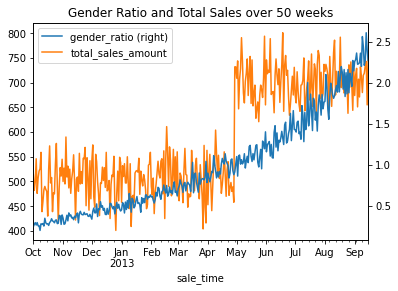

In [204]:
plot_df.plot(secondary_y=['gender_ratio'], title='Gender Ratio and Total Sales over 50 weeks')

## the gender ratio increased steadily and did not expalin the sudden change in total sales 
## --> we should look at other reasons such as seasonality, market campaign, and new features from the company

# Assume a given day is divided into four dayparts:
# night (12:00AM - 6:00AM),
# morning (6:00AM - 12:00PM),
# afternoon (12:00PM - 6:00PM),
# evening (6:00PM - 12:00AM).
# What is the percentage of sales in each daypart over all 50 weeks?

In [205]:
big_df

,sale_time,purchaser_gender
0,2013-01-07 02:14:07,female
1,2013-01-07 02:57:53,male
2,2013-01-07 02:59:49,female
3,2013-01-07 03:02:53,male
4,2013-01-07 03:27:36,female
...,...,...
204324,2013-08-18 23:05:04,male
204325,2013-08-18 23:07:48,female
204326,2013-08-18 23:10:08,male
204327,2013-08-18 23:25:14,female


In [ ]:
## step 1: create a new column to identify sale_time to different time categories 
## step 2: group by time categories 

In [206]:
big_df.dtypes

sale_time           object
purchaser_gender    object
dtype: object

In [209]:
big_df['sale_hour']=pd.to_datetime(big_df['sale_time']).dt.ceil('h').dt.hour

In [210]:
big_df

,sale_time,purchaser_gender,sale_hour
0,2013-01-07 02:14:07,female,3
1,2013-01-07 02:57:53,male,3
2,2013-01-07 02:59:49,female,3
3,2013-01-07 03:02:53,male,4
4,2013-01-07 03:27:36,female,4
...,...,...,...
204324,2013-08-18 23:05:04,male,0
204325,2013-08-18 23:07:48,female,0
204326,2013-08-18 23:10:08,male,0
204327,2013-08-18 23:25:14,female,0


In [ ]:
## create a function to put each record to different time categories 

In [216]:
def assign_time_category(sale_hour): 
    if sale_hour > 6 and sale_hour <12: 
        return 'morning'
    if sale_hour >12 and sale_hour <18: 
        return 'afternoon'
    if sale_hour >18 and sale_hour <24: 
        return 'evening'
    if sale_hour >-1 and sale_hour <6:
        return 'night'

In [217]:
big_df['time_category']=big_df['sale_hour'].apply(assign_time_category)

In [218]:
big_df

,sale_time,purchaser_gender,sale_hour,time_category
0,2013-01-07 02:14:07,female,3,night
1,2013-01-07 02:57:53,male,3,night
2,2013-01-07 02:59:49,female,3,night
3,2013-01-07 03:02:53,male,4,night
4,2013-01-07 03:27:36,female,4,night
...,...,...,...,...
204324,2013-08-18 23:05:04,male,0,night
204325,2013-08-18 23:07:48,female,0,night
204326,2013-08-18 23:10:08,male,0,night
204327,2013-08-18 23:25:14,female,0,night


In [222]:
percentage = big_df.groupby('time_category').size().to_frame('total').reset_index()

In [228]:
percentage['percentage']=percentage['total']/percentage['total'].sum()

In [229]:
percentage

,time_category,total,percentage
0,afternoon,68119,0.394595
1,evening,41111,0.238145
2,morning,49833,0.288669
3,night,13567,0.078590


I conclude that the sales records perform better during afternoon --> company should put more efforts on market strategy in this time